<a href="https://colab.research.google.com/github/bysubanji/Netflix_movies_and_Tv_shows_clustering/blob/main/Final_Notebook_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



In [ ]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<u>Importing all Necessary Libraries</u>

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
import plotly.express as px
import time
from datetime import datetime
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#All Machine learning Models are imported here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

#<u>NETFLIX MOVIES AND TV SHOWS  DATA FRAME</u>

In [ ]:
#loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Projects - Almabetter/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df=pd.DataFrame(df)

##Data types of each column

In [ ]:
#head of df
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#shape of df
df.shape

(7787, 12)

In [ ]:
#checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

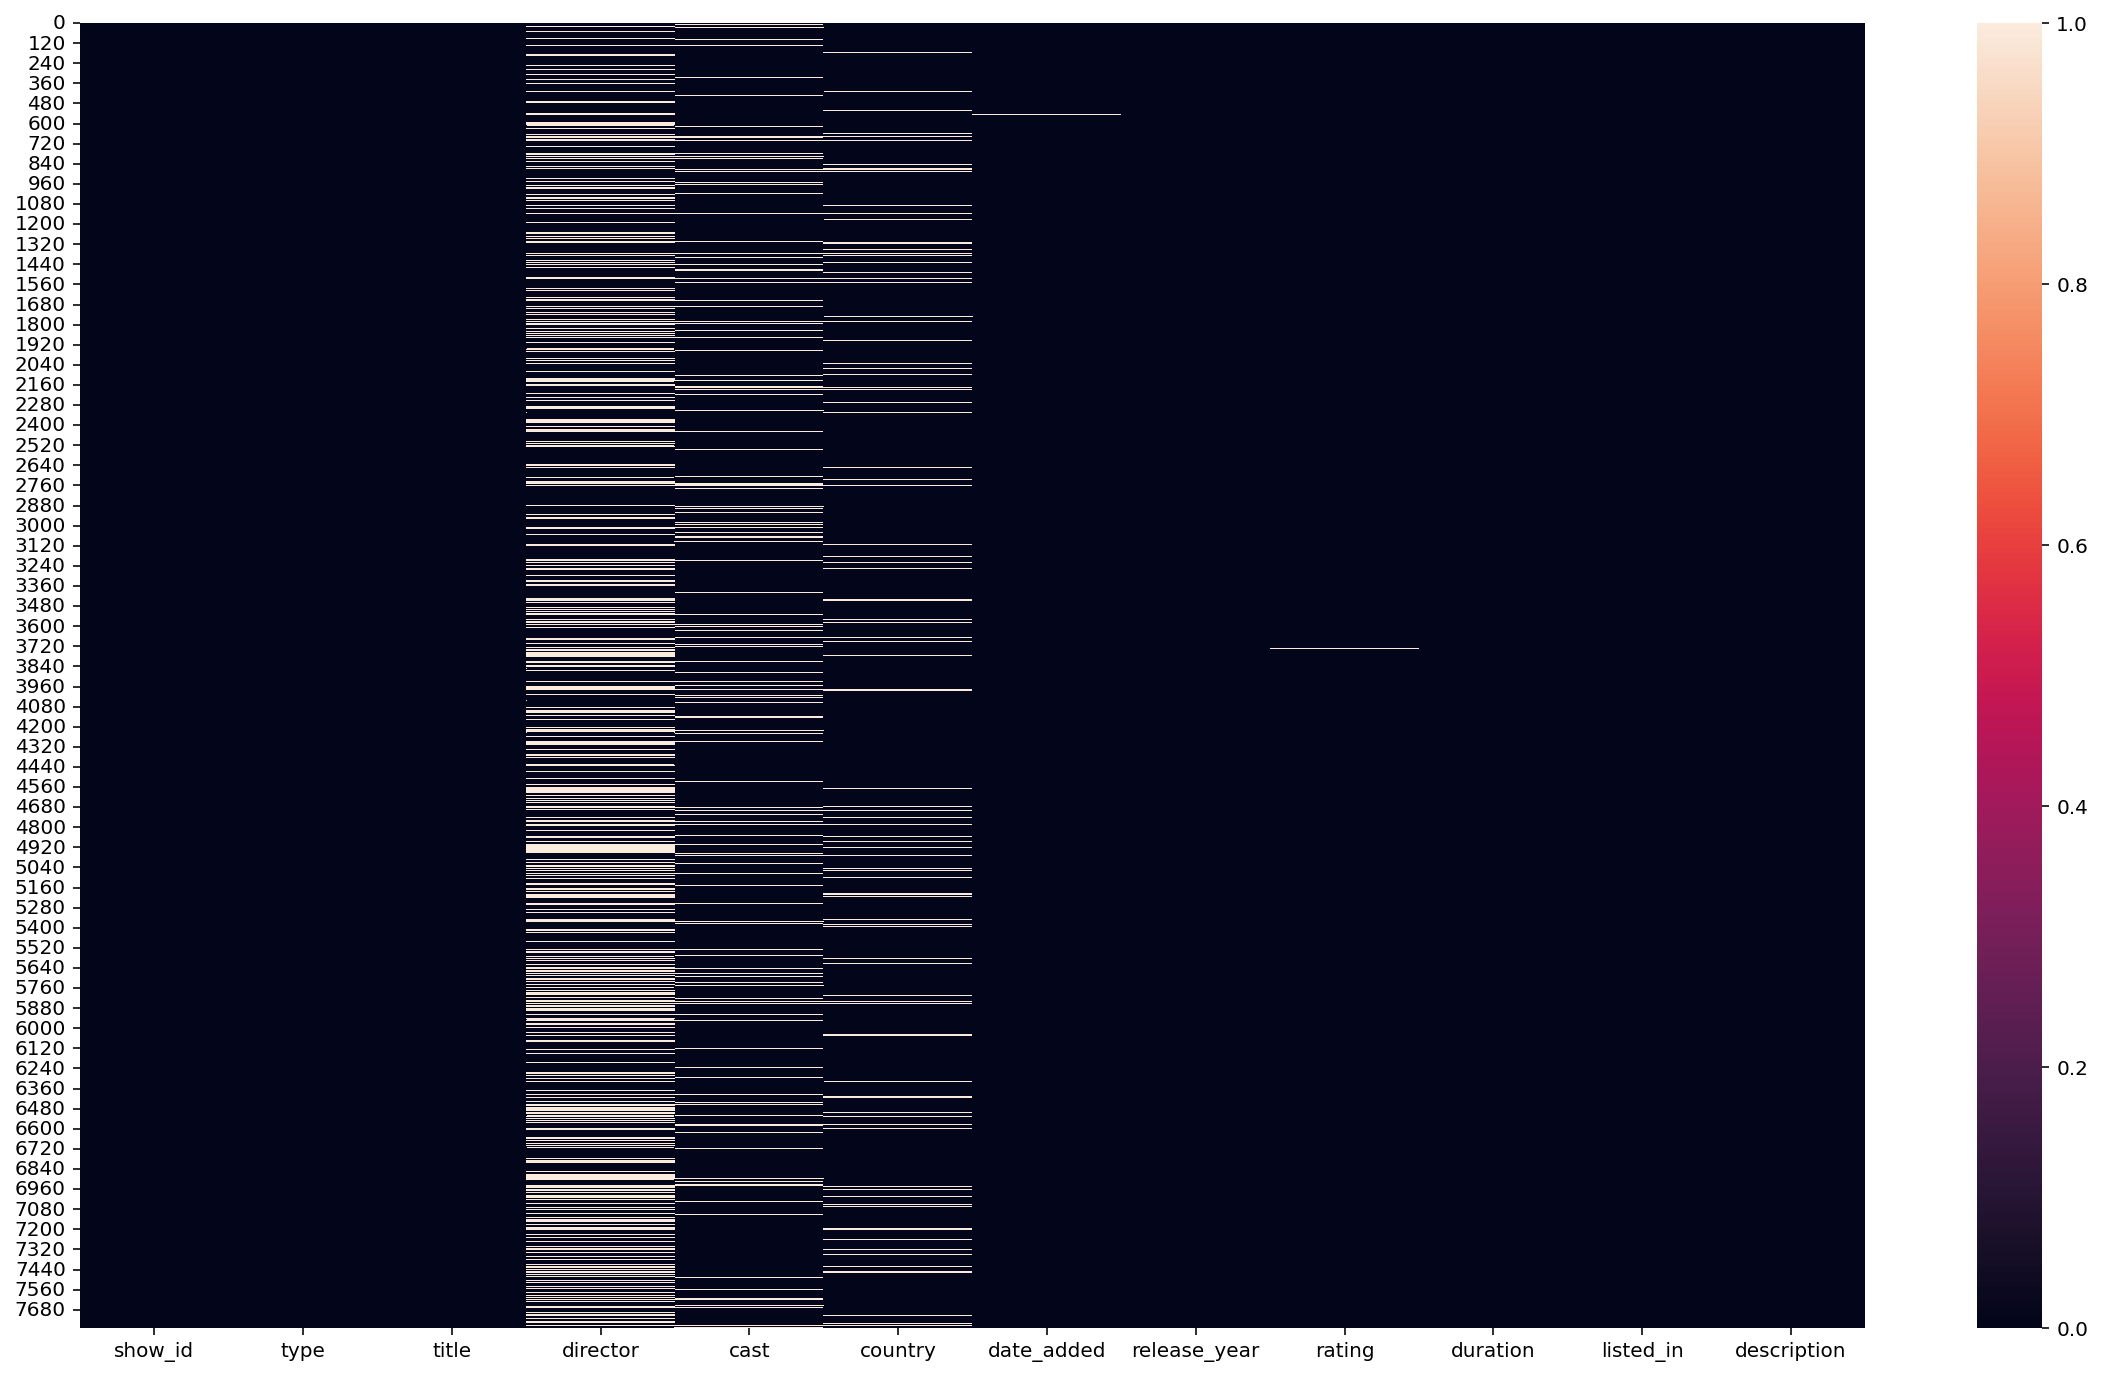

In [ ]:
#checking null values by visualizing it
plt.figure(figsize=(20,12))
sns.heatmap(df.isna())

In [ ]:
#droping director feature from df
df.drop(['director'],axis=1,inplace=True)
#droping all null values from cast,country,date_added and rating features 
df_cleaned=df.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [ ]:
#cheacking null values of df_cleaned variable 
df_cleaned.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [ ]:
#using lambda funtion for country feature in df_cleaned variable
df_cleaned['country']=df_cleaned['country'].apply(lambda x:x.split(","))

In [ ]:
#creating new variable as df_new 
df_new=pd.DataFrame(columns=df_cleaned.columns)

In [ ]:
#using iterrows() function in country feature
indic=0
count=0
for index, row in df_cleaned.iterrows():
    if len(df_cleaned.loc[index,'country'])>1:
      count=len(df_cleaned.loc[index,'country'])+count
      for data in df_cleaned.loc[index,'country']:
        country_name=[]
        indic=indic+0
        country_name_list=list(df_cleaned.loc[index])
        country_name.append(data)
        country_name_list[4]=country_name
        df_new.loc[indic]=country_name_list
        indic=indic+1
      df_cleaned.drop(index,inplace=True)

In [ ]:
#using reset_index() method for df_cleaned variable
df_cleaned.reset_index(drop=True,inplace=True)
df_clean_frame=df_cleaned.append(df_new,ignore_index=True)

In [ ]:
#using the lambda function for some data augmentation
df_clean_frame['country']=df_clean_frame['country'].apply(lambda x:x[0])
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:x.strip())
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:datetime.strptime(x,'%B %d, %Y'))
df_clean_frame['release_year']=df_clean_frame['release_year'].astype('int')

In [ ]:
#changing the names of some features 
df_clean_frame.rename(columns={'type':'Type_of_show','title':'Title_of_Movie/show','cast':'Actors','date_added':'Date_Added_in_netflix','release_year':'Release_year','rating':'Ratings','listed_in':'Genre'},inplace=True)

In [ ]:
#clean dataframe
df_clean_frame.drop([6361,6527],inplace=True)
df_clean_frame.reset_index(drop=True,inplace=True)

In [ ]:
#head of df_clean_frame
df_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#shape of df_clean_frame
df_clean_frame.shape

(8262, 11)

## Data Cleaning and Feature Engineering 

In [ ]:
#checking dtype of df_clean_frame
df_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object

# 1. Exploratory Data Analysis
###i)Name the cast who has been acted more times only for Indian Movies?
###ii)What is more popular on Netflix, movies or TV shows?
###iii)Name the top two countries where Netflix is most popular?
###iv)In December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month?

__i) Name the cast who has been acted more times only for Indian Movies?__

In [ ]:
#extracing india from country column
df_india=df_clean_frame.loc[df_clean_frame['country']=='India',:]

In [ ]:
#defining stripping and returning the dates
def stripping(x):
  datas=[]
  for i in x:
    datas.append(i.strip())
  return datas

In [ ]:
#using lambda function for Actors feature in df_india variable
df_india['Actors']=df_india['Actors'].apply(lambda x:x.split(','))
df_india['Actors']=df_india['Actors'].apply(lambda x:stripping(x))

In [ ]:
#creating actors_list=[]
actors_list=[]
for i in df_india['Actors']:
  actors_list.extend(i)

In [ ]:
#top five actors who acted more times in indian movies
actors_df=pd.DataFrame(actors_list,columns=['Actors'])
actors_df=actors_df.value_counts().reset_index()
actors_df.rename(columns={0:'Count'},inplace=True)
actors_df.head(5)

,Actors,Count
0,Anupam Kher,39
1,Shah Rukh Khan,33
2,Naseeruddin Shah,29
3,Akshay Kumar,28
4,Om Puri,27


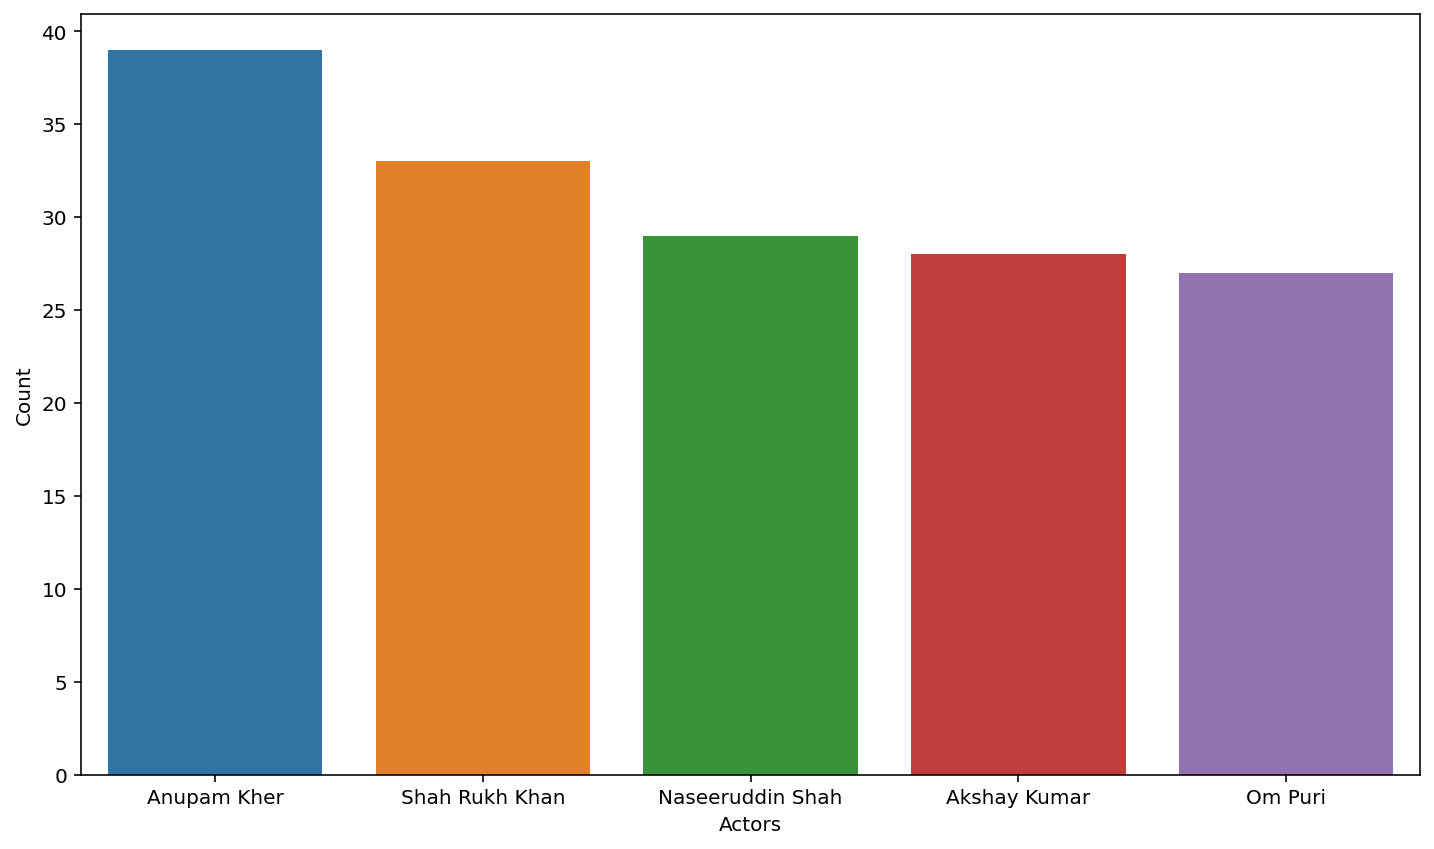

In [ ]:
#visualising top five actors who acted more times in indian movies
plt.figure(figsize=(12,7))
sns.barplot(x=actors_df['Actors'].head(5),y=actors_df['Count'].head(5))

As we can see from the plot, Anupam Kher has acted in more Indian films than anyone else.

__ii) What is more popular on Netflix, movies or TV shows?__

In [ ]:
#Movies and Tv Shows available on netflix
movies_and_tv_shows=df_clean_frame['Type_of_show'].value_counts().reset_index()
movies_and_tv_shows

,index,Type_of_show
0,Movie,6080
1,TV Show,2182


In [ ]:
#visualising What is more popular on Netflix, movies or TV shows
(px.bar(movies_and_tv_shows, x="index",y="Type_of_show", color="index")
.update_layout(title_font_size=50)
.update_xaxes(showgrid=True)
).show()

As we can see in the plot, there are more movies available on Netflix compared to TV shows. That means movies are more popular than TV shows.

__iii) Name the top two countries where Netflix is most popular?__

In [ ]:
#top_two countries where netflix is most popular
top_two=df_clean_frame['country'].value_counts().head(3).reset_index()
top_two

,index,country
0,United States,2541
1,India,927
2,United Kingdom,499


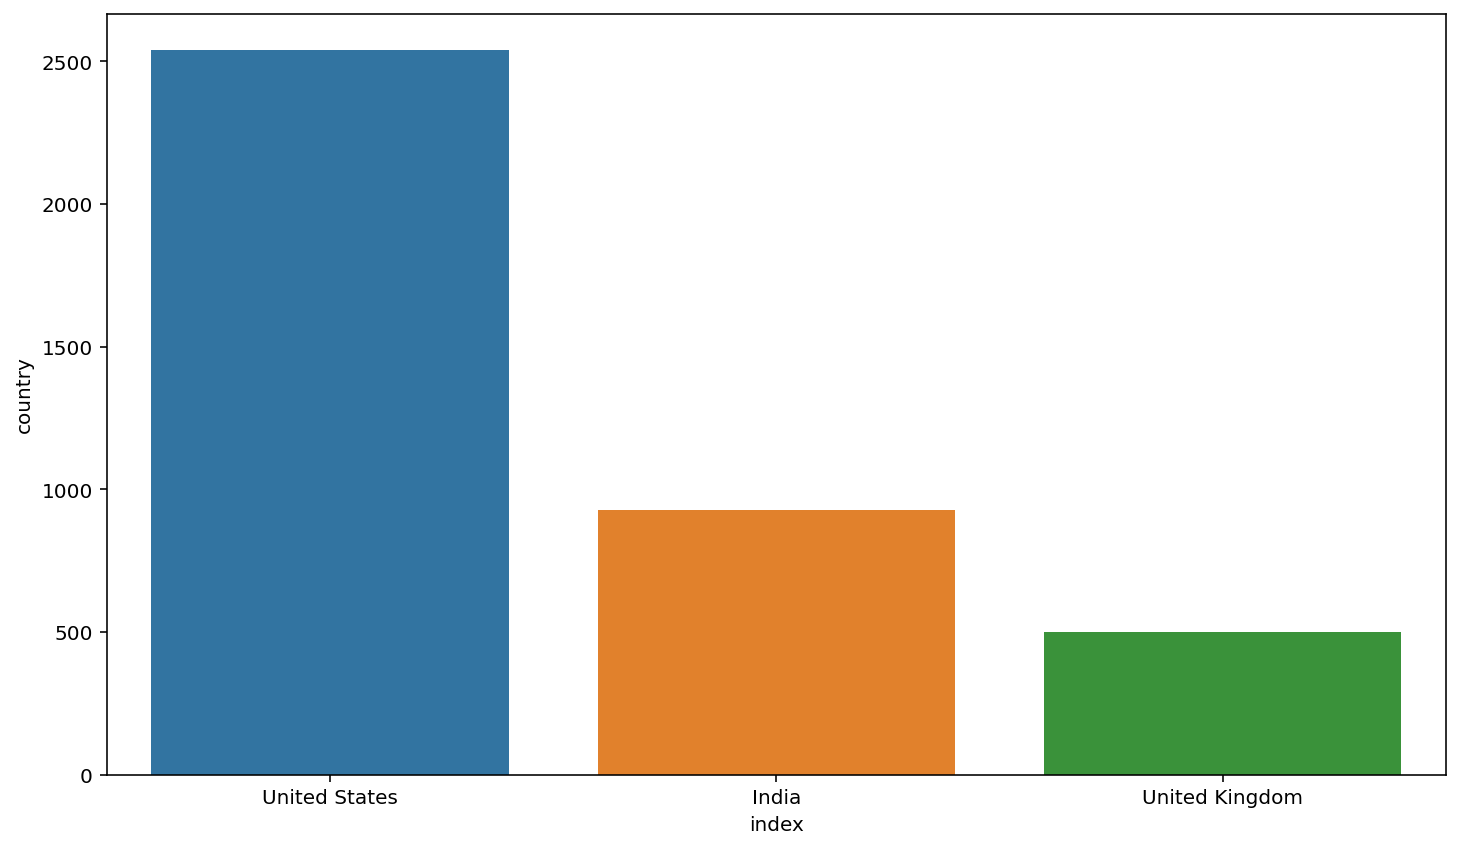

In [ ]:
#Visualising Which are the top two countries using Netfilx
plt.figure(figsize=(12,7))
sns.barplot(x=top_two['index'],y=top_two['country'])

As can be seen in the plot above, the United States and India are the two countries where Netflix is most popular.

__iv) In December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month?__

In [ ]:
#creating two columns year and month in df_clean_frame variable
df_clean_frame['year']=pd.DatetimeIndex(df_clean_frame['Date_Added_in_netflix']).year
df_clean_frame['month']=pd.DatetimeIndex(df_clean_frame['Date_Added_in_netflix']).month

In [ ]:
#creating df_new11 variable
df_new11=pd.DataFrame(columns=df_clean_frame.columns)

In [ ]:
#extracting 12th month and 2020 year from month and year feature 
indic=0
for index,row in df_clean_frame.iterrows():
    if (df_clean_frame.loc[index,'month']==12) & (df_clean_frame.loc[index,'year']==2020):
      df_new11.loc[indic]=df_clean_frame.loc[index,:]
      indic=indic+1

In [ ]:
#groupby Type_of_show and Ratings
ratings_december_2020=df_new11.groupby(['Type_of_show','Ratings'])['country'].count().reset_index().rename(columns={'country':'count'})
ratings_december_2020

,Type_of_show,Ratings,count
0,Movie,PG,7
1,Movie,PG-13,22
2,Movie,R,20
3,Movie,TV-14,23
4,Movie,TV-G,3
5,Movie,TV-MA,33
6,Movie,TV-PG,5
7,Movie,TV-Y,4
8,Movie,TV-Y7,2
9,TV Show,TV-14,18


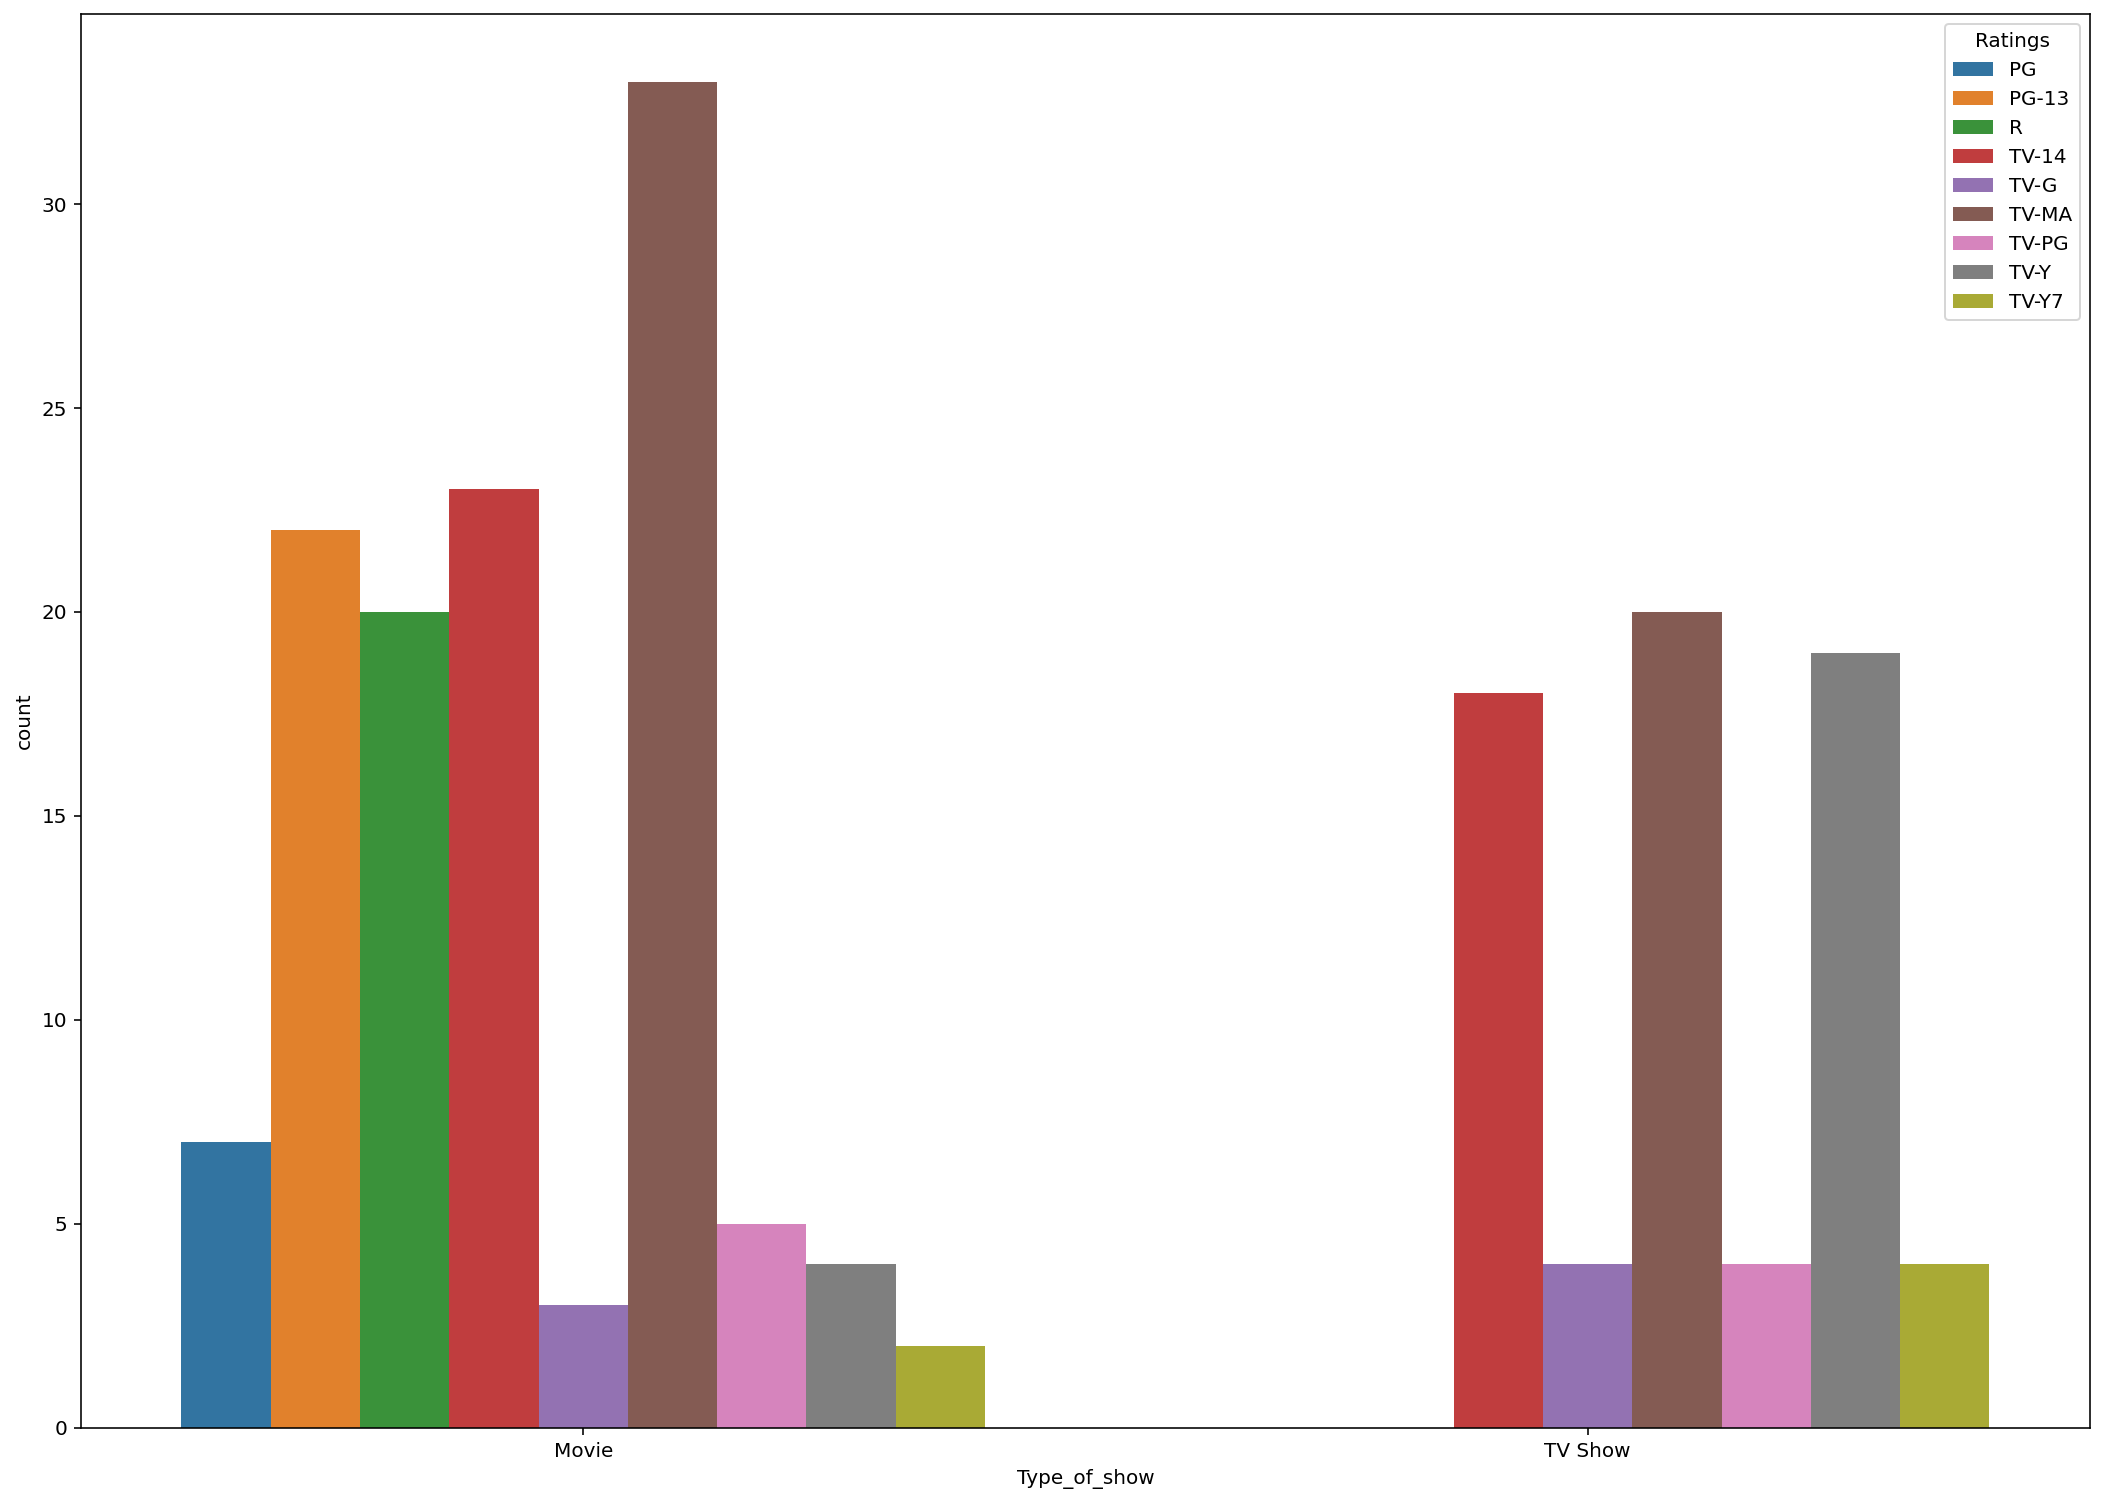

In [ ]:
#visualising in December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month
plt.figure(figsize=(18,13))
sns.barplot(x=ratings_december_2020['Type_of_show'],y=ratings_december_2020['count'],hue=ratings_december_2020['Ratings'])

As shown in the plot above, TV-MA ratings in December 2020 are the highest in movies and TV shows, with TV-MA standing for Mature Audience Only. Because this programme is intended for adults, it may not be appropriate for children under the age of 17.

# 2. Understanding what type content is available in different countries


In [ ]:
#groupby country and Ratings feature
content_in_different_countries=df_clean_frame.groupby(['country','Ratings'])['Actors'].count().reset_index()
content_in_different_countries.drop('Actors',axis=1,inplace=True)

In [ ]:
#visualising what type content is available in different countries
(px.bar(content_in_different_countries, x="Ratings",y="country", color="country")
.update_layout(title_font_size=200)
.update_xaxes(showgrid=True)
).show()

As we can see from the plot above, there are various types of content available, but in most countries, TV-MA content is available, and the TV-MA rating you see on many Netflix TV series signifies that the programme is only suitable for mature viewers. A TV show with a TV-MA rating features graphic violence or a combination of brutal violence. So that could be the reason for it, because the Netflix audience enjoys this type of content. 

# 3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [ ]:
#groupby year and type of show feature
tv_rather_than_movies=df_clean_frame.groupby(['year','Type_of_show'])['show_id'].count().reset_index().rename(columns={'show_id':'count'})

In [ ]:
#visualising type_of_show feature w.r.t. years
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(tv_rather_than_movies, x='year', y='count', color='Type_of_show')
fig.show()

In the plot above, we can see that Netflix has been increasingly focusing on movies rather than TV shows in recent years, as evidenced by the fact that after 2014, Netflix has relied more on movies than TV shows.

# Making some hypothesis from the data visualized

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df_clean_frame.copy()

In [ ]:
#head of df_hypothesis
df_hypothesis.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description,year,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["Type_of_show"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['Ratings'].replace(ratings_ages)
#let's see unique target ages 
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [ ]:
#head of df_
df_hypothesis.head(3)

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description,year,month,target_ages
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Teens


In [ ]:
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,74.622407
1,Older Kids,95.322718
2,Teens,111.754748
3,Adults,100.947937


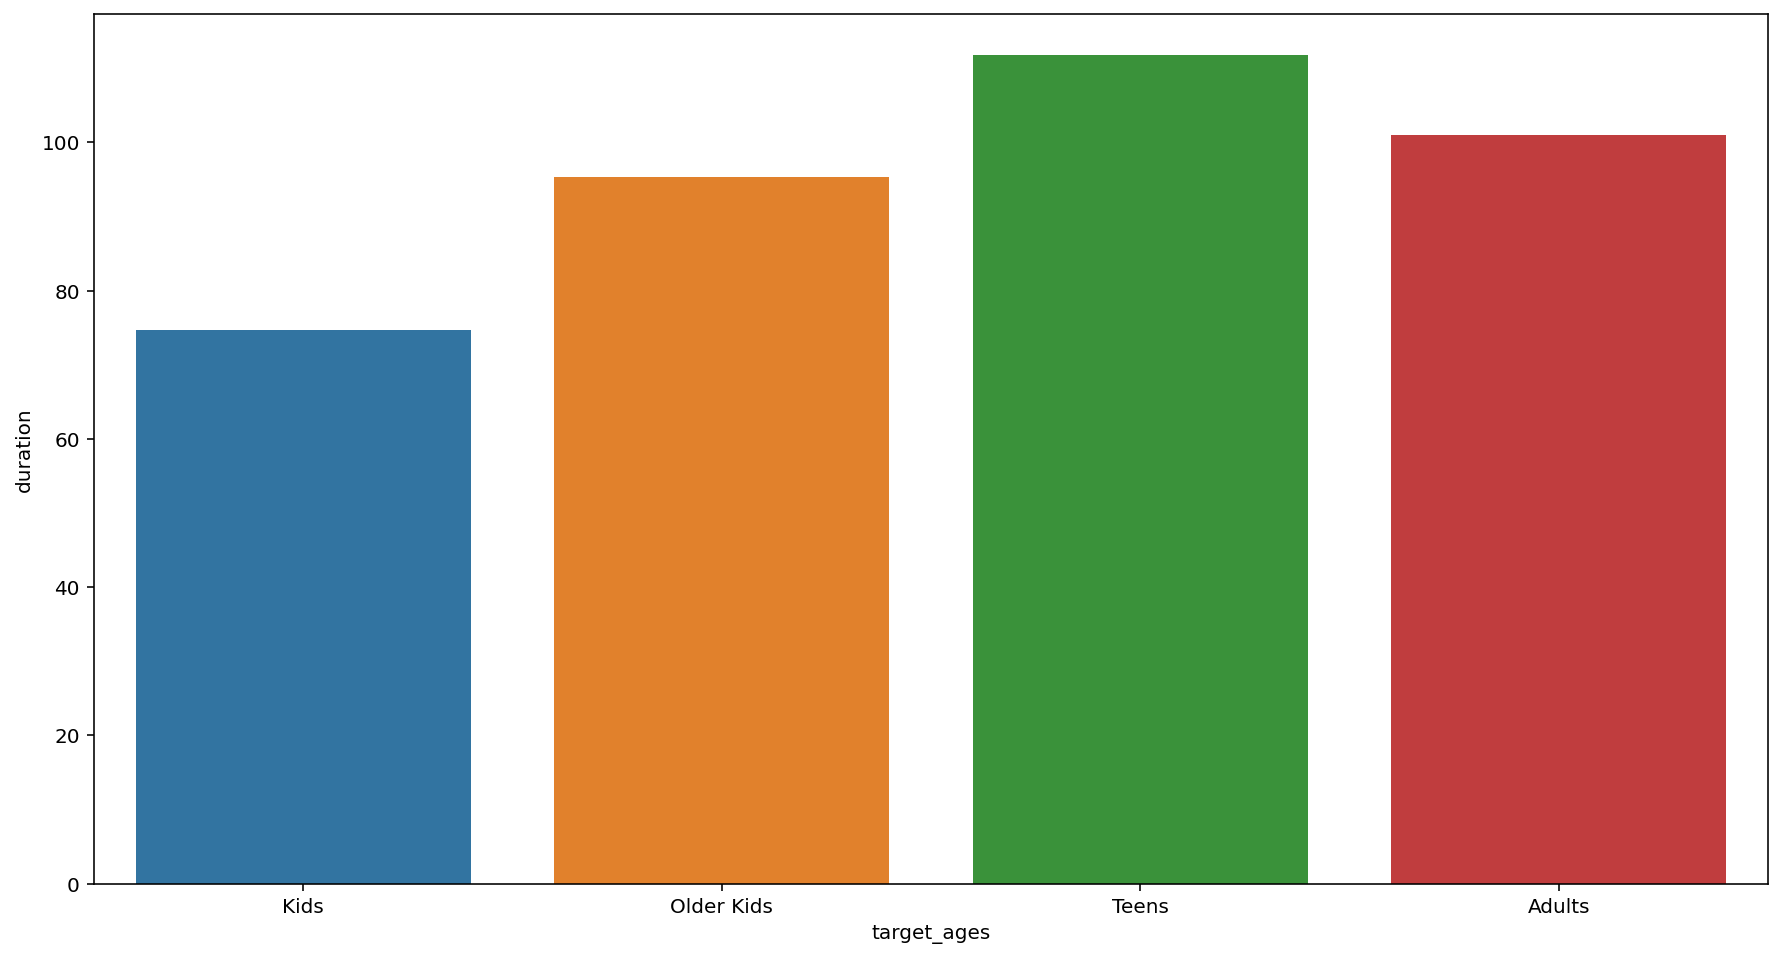

In [ ]:
#visualising target_ages w.r.t. duration feature
plt.figure(figsize=(15,8))
sns.barplot(x=group['target_ages'],y=group['duration'])

As shown in the graph above, teens have the longest average duration of time for movies, while kids have the lowest.

**Hypothesis- kids and older kids rated movies are of atleast 2 hours long.**

In [ ]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')

In [ ]:
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    74.622407
dtype: float64 
 Mean for  movies rated for older kids duration    95.322718
dtype: float64
Std for  movies rated for Older Kids duration    27.895697
dtype: float64 
 Std for  movies rated for kids duration    28.817431
dtype: float64


In [ ]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

241 942
dof 1181
SP_2 = duration    819.821248
dtype: float64
SP duration    28.632521
dtype: float64
tvalue -10.015182906255275


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9619747067977586

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9619747067977582

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

# 4. Clustering similar content by matching text-based features

In [ ]:
#head of df_clean_frame
df_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description,year,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [ ]:
#using tolist() function to Convert description column to list 
content = df_clean_frame['description'].tolist()
content

['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.',
 'A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.',
 'After an awful accident, a couple admitted to a grisly hospital are separated and must find each o

In [ ]:
#using  lower() method for Changing the string into lower case
content = [low.lower() for low in content]
#using sub() function for Handling all the urls and (@) present in content variable 
content = [re.sub("\w+://\S+","", urls) for urls in content]
content =[re.sub("@\w+","", handles) for handles in content]

In [ ]:
#using tokenization functions for the text present in content variable
content= [word_tokenize(word) for word in content]

In [ ]:
#Removing stopwords and punctuation from the description feature 
removing_stopwords= stopwords.words("english")
removing_punctuation= list(punctuation)
removing_punctuation.extend(['...','``',"''",".."])
removing_context= ['rt', 'amp',"'s"]
final_variable= removing_stopwords + removing_punctuation + removing_context

In [ ]:
#defining final_stop function to remove the stop words
def final_stop(final):
    return [re.sub("#","",term) for term in final if ((term not in final_variable) & (len(term)>1))]
content_clean = [final_stop(clean) for clean in content]

In [ ]:
#creating a cleaned_list where all the words of the cleaned data is present and getting top 10 words using counter over top_term variable 
cleaned_list= []
for i in content_clean:
    cleaned_list.extend(i)
top_terms= Counter(cleaned_list)
top_terms.most_common(10)

[('young', 778),
 ('life', 714),
 ('new', 655),
 ('family', 610),
 ('man', 529),
 ('world', 502),
 ('woman', 488),
 ('love', 446),
 ('two', 445),
 ('must', 411)]

In [ ]:
#using join method to form a string by Joining all the words 
content_clean = [" ".join(label) for label in content_clean]

# TFIDF

In [ ]:
#tfid_vectorizer variable 
tfid_vectorizer= TfidfVectorizer()

In [ ]:
#using tfid_vectorizer for fiting content_clean variable and converting it into arrays 
content_tfidf = tfid_vectorizer.fit_transform(content_clean).toarray()

In [ ]:
#shape of content_tfidf
content_tfidf.shape

(8262, 16635)

In [ ]:
#content_tfidf
content_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

As we can see, the content_tfidf variable has 8262 rows and 16635 columns, which is far too enormous, so we'll use PCA to shrink it.

# Implementation of PCA FOR DIMENSION REDUCTION

In [ ]:
#Scale data before applying PCA
scaling=StandardScaler()
 
#Use fit and transform method
scaling.fit(content_tfidf)
Scaled_data=scaling.transform(content_tfidf)
 
#Set the n_components=4000
principal=PCA(n_components=4000)
principal.fit(Scaled_data)
pca_content_tfidf=principal.transform(Scaled_data)
 
#Check the dimensions of data after PCA
print(pca_content_tfidf.shape)

(8262, 4000)


In [ ]:
#pca_content_tfidf
pca_content_tfidf

array([[-0.00468954, -0.17356309, -0.11852505, ...,  1.7993778 ,
        -0.9109731 ,  0.05569491],
       [-0.09792966, -0.34434724, -0.11147859, ..., -0.42064094,
         1.85477888,  0.25206995],
       [-0.13288831, -0.25843187, -0.14825203, ...,  0.11880056,
         1.06621072, -0.68934973],
       ...,
       [-0.14058933, -0.26818504, -0.18241798, ..., -0.01684849,
        -0.40300415, -0.35580771],
       [-0.14058933, -0.26818504, -0.18241798, ..., -0.01684849,
        -0.40300415, -0.35580771],
       [-0.14058933, -0.26818504, -0.18241798, ..., -0.01684849,
        -0.40300415, -0.35580771]])

In [ ]:
#Check the values of eigen vectors prodeced by principal components
principal.components_

array([[ 8.65538248e-04,  7.75794092e-03, -2.19978187e-04, ...,
        -1.78976948e-04, -1.07974378e-04, -9.20353037e-05],
       [ 8.94838654e-03, -3.35113194e-03, -2.38923047e-04, ...,
        -7.12488331e-04, -7.79114807e-05, -6.39176516e-04],
       [-1.29770595e-04, -1.46033524e-03, -4.08188150e-04, ...,
        -2.49450157e-04, -1.41392758e-04, -1.25202016e-04],
       ...,
       [-1.67416870e-03, -1.78965320e-03, -5.02490115e-03, ...,
        -2.02612865e-03, -1.34510860e-02, -1.54984020e-03],
       [ 8.55420145e-03, -4.63719558e-04,  2.64101956e-03, ...,
        -7.81591357e-03,  1.29588146e-02, -4.49061824e-04],
       [-8.68433893e-03,  3.45683103e-04,  5.33865802e-03, ...,
        -1.68290432e-02,  1.10678013e-02,  1.27046373e-03]])

In [ ]:
#check how much variance is explained by each principal component
principal.explained_variance_ratio_.sum()*100

84.06261683542111

Now we can evaluate how much variation is described by each principal component, and we can see that it is explained by more than 84%. Therefore, we may use 4000 components to continue. 

### TFIDF after implementation of  Principal component analysis with maximum features set to 4000

In [ ]:
#In tfid_vectorizer variable giving max_features=4000
tfid_vectorizer= TfidfVectorizer(max_features=4000)

In [ ]:
#using tfid_vectorizer for fiting content_clean variable and converting it into arrays 
content_tfidf = tfid_vectorizer.fit_transform(content_clean).toarray()

In [ ]:
#shape of content_tfidf
content_tfidf.shape

(8262, 4000)

In [ ]:
#content_tfidf
content_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#fiting content_tfidf variable in model and checking sse
sse=[]
for i in range(1,39):
    model = KMeans(n_clusters=i)
    model.fit(content_tfidf)
    error = model.inertia_
    sse.append(error)
    print('cluster: %d \t SSE: %0.2f'%(i,error))

cluster: 1 	 SSE: 8201.25
cluster: 2 	 SSE: 8179.48
cluster: 3 	 SSE: 8161.43
cluster: 4 	 SSE: 8147.95
cluster: 5 	 SSE: 8133.05
cluster: 6 	 SSE: 8117.87
cluster: 7 	 SSE: 8104.63
cluster: 8 	 SSE: 8089.97
cluster: 9 	 SSE: 8076.85
cluster: 10 	 SSE: 8064.30
cluster: 11 	 SSE: 8061.46
cluster: 12 	 SSE: 8045.17
cluster: 13 	 SSE: 8034.87
cluster: 14 	 SSE: 8019.62
cluster: 15 	 SSE: 8014.44
cluster: 16 	 SSE: 8008.31
cluster: 17 	 SSE: 7993.17
cluster: 18 	 SSE: 7980.81
cluster: 19 	 SSE: 7985.55
cluster: 20 	 SSE: 7966.50
cluster: 21 	 SSE: 7959.17
cluster: 22 	 SSE: 7954.74
cluster: 23 	 SSE: 7948.61
cluster: 24 	 SSE: 7939.26
cluster: 25 	 SSE: 7933.60
cluster: 26 	 SSE: 7924.96
cluster: 27 	 SSE: 7919.59
cluster: 28 	 SSE: 7913.17
cluster: 29 	 SSE: 7905.65
cluster: 30 	 SSE: 7896.00
cluster: 31 	 SSE: 7899.26
cluster: 32 	 SSE: 7889.69
cluster: 33 	 SSE: 7889.58
cluster: 34 	 SSE: 7877.28
cluster: 35 	 SSE: 7872.06
cluster: 36 	 SSE: 7865.44
cluster: 37 	 SSE: 7866.85
cluster: 3

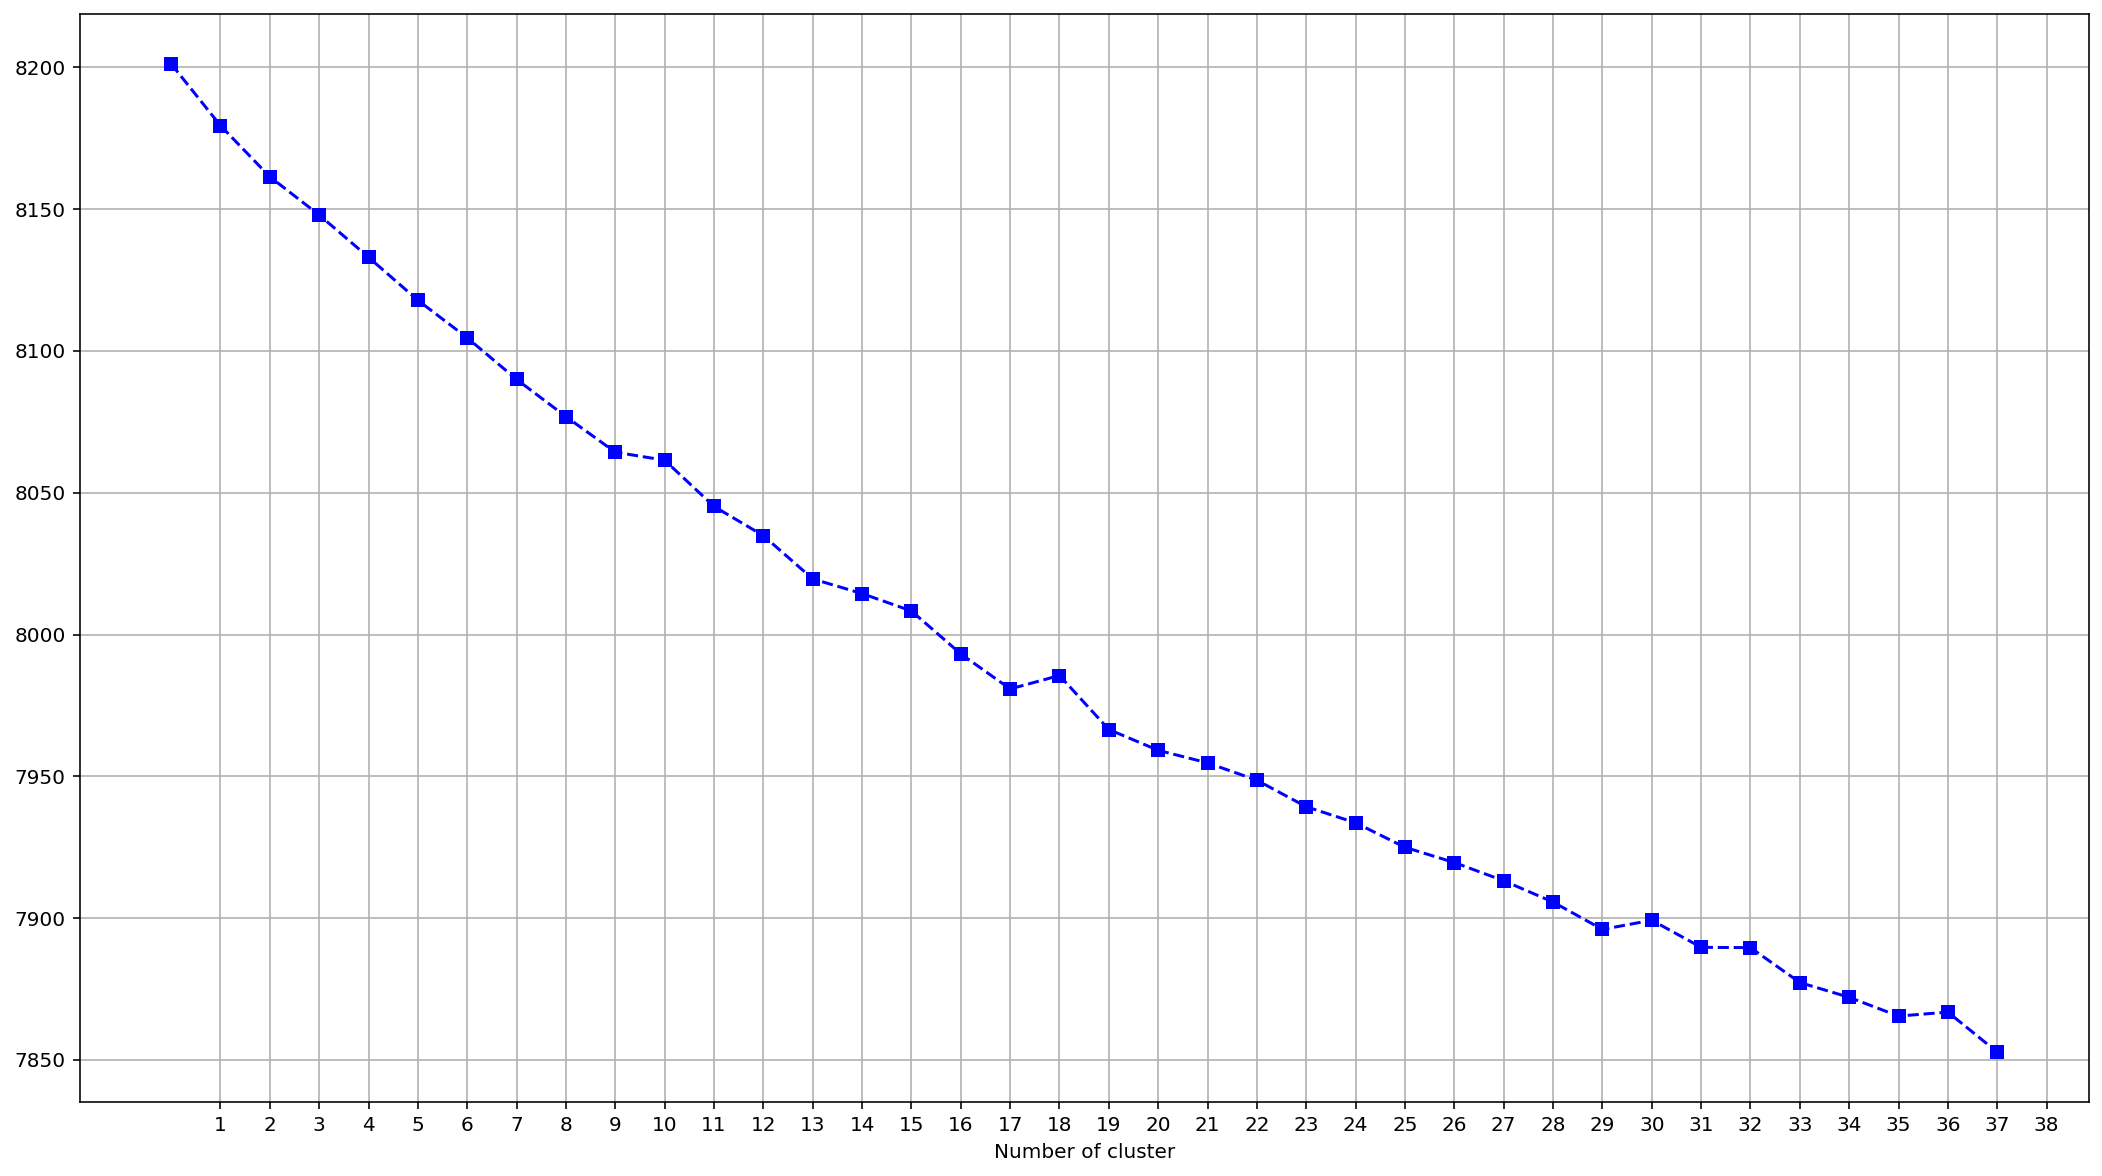

In [ ]:
#giving figure.figsize to visualize it in better way
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
#elbow method and the range of clusters are varying from 1 to 39 
plt.plot(sse,'bs--')
plt.xticks(list(range(1,39)),list(range(1,39)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [ ]:
#sillhoute score of clusters 
sill = [] 
for i in range(2,39):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(content_tfidf)
    y1 = model.predict(content_tfidf)
    score = silhouette_score(content_tfidf,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0017
cluster: 3 	 Sillhoute: 0.0020
cluster: 4 	 Sillhoute: 0.0027
cluster: 5 	 Sillhoute: 0.0032
cluster: 6 	 Sillhoute: 0.0036
cluster: 7 	 Sillhoute: 0.0040
cluster: 8 	 Sillhoute: 0.0041
cluster: 9 	 Sillhoute: 0.0050
cluster: 10 	 Sillhoute: 0.0054
cluster: 11 	 Sillhoute: 0.0061
cluster: 12 	 Sillhoute: 0.0060
cluster: 13 	 Sillhoute: 0.0060
cluster: 14 	 Sillhoute: 0.0068
cluster: 15 	 Sillhoute: 0.0066
cluster: 16 	 Sillhoute: 0.0071
cluster: 17 	 Sillhoute: 0.0077
cluster: 18 	 Sillhoute: 0.0080
cluster: 19 	 Sillhoute: 0.0083
cluster: 20 	 Sillhoute: 0.0085
cluster: 21 	 Sillhoute: 0.0086
cluster: 22 	 Sillhoute: 0.0087
cluster: 23 	 Sillhoute: 0.0091
cluster: 24 	 Sillhoute: 0.0089
cluster: 25 	 Sillhoute: 0.0092
cluster: 26 	 Sillhoute: 0.0097
cluster: 27 	 Sillhoute: 0.0094
cluster: 28 	 Sillhoute: 0.0103
cluster: 29 	 Sillhoute: 0.0096
cluster: 30 	 Sillhoute: 0.0106
cluster: 31 	 Sillhoute: 0.0102
cluster: 32 	 Sillhoute: 0.0101
cluster: 33 	 Si

Clustering is the process of splitting a population or set of data points into many groups so that data points in the same group are more similar than data points in other groups. To put it another way, the goal is to separate groups with similar characteristics and assign them to clusters. We used the Elbow method and the Silhoute score to do so, and we chose the 28 clusters based on the results.

##Implementation of Kmeans clustering

In [ ]:
#Kmeans clustering Implementation
Kmeans_clustersmodel= KMeans(n_clusters=28, init='k-means++', max_iter=100, n_init=1,random_state=51)
Kmeans_clustersmodel.fit(content_tfidf)

KMeans(max_iter=100, n_clusters=28, n_init=1, random_state=51)

In [ ]:
#Predicting from model and also checking centres_Cluster in arrays
pred= Kmeans_clustersmodel.predict(content_tfidf)
centres_Cluster= Kmeans_clustersmodel.cluster_centers_
centres_Cluster

array([[ 8.72011136e-04,  6.50521303e-19, -1.95156391e-18, ...,
         2.27682456e-18,  7.58941521e-19,  9.21571847e-19],
       [ 5.13646304e-04, -2.11419424e-18, -4.33680869e-18, ...,
        -5.42101086e-19,  1.02999206e-18,  1.46367293e-18],
       [-6.50521303e-19,  3.25260652e-19,  1.73472348e-18, ...,
         4.33680869e-19,  0.00000000e+00, -4.33680869e-19],
       ...,
       [-6.50521303e-19,  2.71050543e-19,  1.51788304e-18, ...,
         5.42101086e-19,  5.42101086e-20, -3.25260652e-19],
       [ 1.81808544e-03,  2.71050543e-19, -2.38524478e-18, ...,
         1.11591482e-03,  1.16412360e-03,  1.11159446e-03],
       [ 3.01076271e-02,  4.33680869e-19,  3.55315705e-03, ...,
         1.93717325e-03,  2.65142392e-03, -2.71050543e-19]])

In [ ]:
#now creating a new feature name as cluster in which each row of content feature is assigned to their separate cluster
df_clean_frame['cluster'] = Kmeans_clustersmodel.labels_

In [ ]:
#head of df_clean_frame
df_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description,year,month,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,9
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,9
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,26
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,9


In [ ]:
#checking the number of clusters
number_of_clusters=df_clean_frame['cluster'].value_counts().reset_index()
number_of_clusters

,index,cluster
0,9,2354
1,1,569
2,21,515
3,26,338
4,0,313
5,6,296
6,11,270
7,10,257
8,5,241
9,18,240


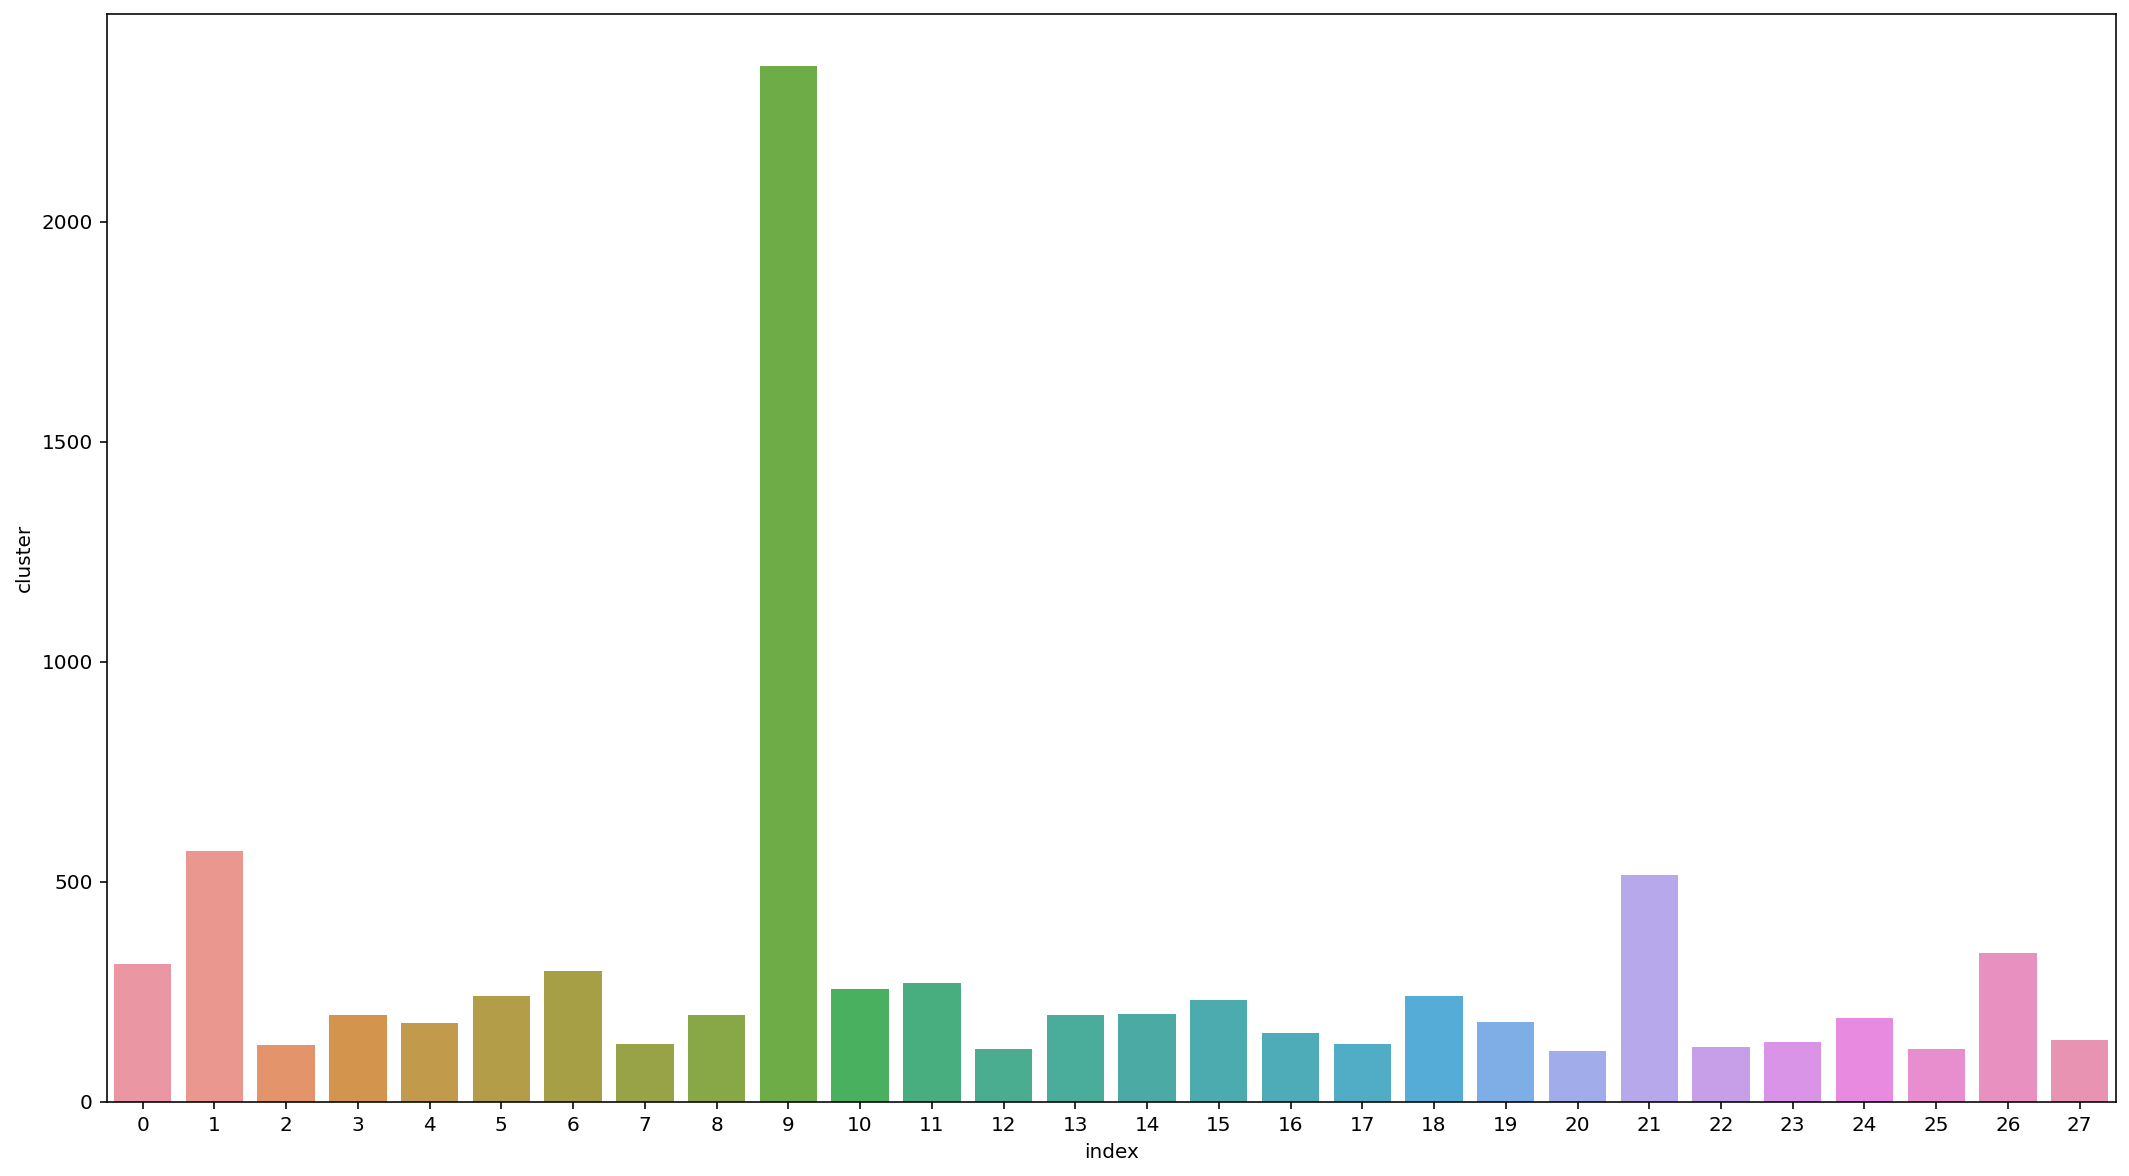

In [ ]:
#checking the number of clusters
plt.figure(figsize=(18,10))
sns.barplot(x=number_of_clusters['index'],y=number_of_clusters['cluster'])

We can observe in the above plot that cluser 9 has the most clusters 2354, while cluser 1 has the second most clusters 569.

In [ ]:
#groupby cluster in df_clean_frame variable 
clusters = df_clean_frame.groupby('cluster')    
print("Cluster centroids: \n")
order_centroids = Kmeans_clustersmodel.cluster_centers_.argsort()[:, ::-1]
terms=tfid_vectorizer.get_feature_names_out()
#printing 10 feature words of each cluster
for i in range(28):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: 
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 christmas
 live
 discovers
 santa
 people
 need
 doctor
 help
 holiday
 faces
------------
Cluster 1:
 life
 love
 new
 family
 falls
 woman
 young
 two
 fall
 finds
------------
Cluster 2:
 drug
 boss
 crime
 lord
 dealer
 escobar
 death
 pablo
 gang
 narcotics
------------
Cluster 3:
 documentary
 follows
 world
 explores
 series
 career
 footage
 life
 interviews
 traces
------------
Cluster 4:
 dangerous
 british
 martial
 arts
 hard
 espionage
 game
 travels
 india
 stakes
------------
Cluster 5:
 old
 year
 new
 10
 boy
 11
 girl
 family
 man
 life
------------
Cluster 6:
 mother
 time
 son
 young
 daughter
 man
 search
 single
 family
 back
------------
Cluster 7:
 soon
 finds
 young
 takes
 new
 starts
 two
 camera
 unexpected
 realizes
------------
Cluster 8:
 story
 true
 based
 events
 drama
 tells
 inspired
 film
 drug
 life
------------
Cluster 9:
 new
 family
 two
 find
 friends
 one
 lives
 home
 must
 finds
------------
Cluster 10:
 fath

# Evaluation Metrics

In [84]:
#Silhouette Coefficient of our clusters
print("Silhouette Coefficient: %0.5f"%silhouette_score(content_tfidf,  Kmeans_clustersmodel.labels_, metric = 'euclidean'))

Silhouette Coefficient: 0.00997


In [85]:
#calinski_harabasz_score of our clusters 
metrics.calinski_harabasz_score(content_tfidf, Kmeans_clustersmodel.labels_)

10.52978918907559

In [86]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(content_tfidf, Kmeans_clustersmodel.labels_)

9.113342463067559

The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, and Compute the Davies-Bouldin score The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. As a result, we can conclude that our cluster is homogeneous within a cluster and heterogeneous with respect to other clusters.

## Interactive scatterplot of the cluster

In [88]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df_clean_frame, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

In the above interactive scatterplot of the cluster, the number of clusters is on the x-axis, and the description feature is on the y-axis, and we may interact with clusters with similar content.

#**CONCLUSION**
* We've done null value treatment, feature engineering, and EDA since loading the dataset, and then we've completed some tasks that were assigned to us.
* In this context, we've noticed that Netflix is increasingly focusing on movies rather than TV shows, especially after 2014.
* We've also found that different types of content are available in different countries, but TV MA is the content that is available in the majority of countries. This could be because it shows that it is just for adult audiences, and the Netflix audience enjoys content like this.
* We've also defined different clusters based on their content; we've defined 28 clusters and implemented the KMEANS clustering algorithm. And then we determined that cluster number nine has the most clusters; we've also plotted a scatter plot in which we may interact with similar content in connection to that cluster.